IMPORTING INELUCTABLE LIBRARIES

In [1]:
import joblib
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mpl

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

IMPORTING DATASET

In [2]:
file = pd.read_csv("K:\PROGRAMS\PYTHON\SSP\SEASONAL_SALE_PREDICTION\SSV.csv")
file = file[["id", "week_id", "value"]]
file.head(20)

,id,week_id,value
0,frozen-yogurt,2004-01,20
1,frozen-yogurt,2004-02,16
2,frozen-yogurt,2004-03,7
3,frozen-yogurt,2004-04,7
4,frozen-yogurt,2004-05,13
5,frozen-yogurt,2004-06,9
6,frozen-yogurt,2004-07,8
7,frozen-yogurt,2004-08,10
8,frozen-yogurt,2004-09,14
9,frozen-yogurt,2004-10,19


PREPROCESSING

In [3]:
file['week_no'] = file['week_id'].str.split('-').str[1].astype(int)
file['year'] = file['week_id'].str.split('-').str[0].astype(int)

file['id'] = file['id'].str.replace('-', ' ')
file.head(5)

,id,week_id,value,week_no,year
0,frozen yogurt,2004-01,20,1,2004
1,frozen yogurt,2004-02,16,2,2004
2,frozen yogurt,2004-03,7,3,2004
3,frozen yogurt,2004-04,7,4,2004
4,frozen yogurt,2004-05,13,5,2004


In [4]:
file['p_id'] = pd.factorize(file['id'])[0] + 1001
file

,id,week_id,value,week_no,year,p_id
0,frozen yogurt,2004-01,20,1,2004,1001
1,frozen yogurt,2004-02,16,2,2004,1001
2,frozen yogurt,2004-03,7,3,2004,1001
3,frozen yogurt,2004-04,7,4,2004,1001
4,frozen yogurt,2004-05,13,5,2004,1001
...,...,...,...,...,...,...
135020,shrimp,2016-48,35,48,2016,1201
135021,shrimp,2016-49,32,49,2016,1201
135022,shrimp,2016-50,39,50,2016,1201
135023,shrimp,2016-51,55,51,2016,1201


In [5]:
category = file.groupby(file.id).first()
category

,week_id,value,week_no,year,p_id
id,,,,,
anise,2004-01,26,1,2004,1145
apple,2004-01,17,1,2004,1113
apple au,2004-01,20,1,2004,1153
apple cider,2004-01,2,1,2004,1157
apple pie,2004-01,3,1,2004,1019
...,...,...,...,...,...
watermelon,2004-01,4,1,2004,1169
whiskey sour,2004-01,20,1,2004,1090
white russian,2004-01,21,1,2004,1089


In [6]:
file.dtypes

id         object
week_id    object
value       int64
week_no     int32
year        int32
p_id        int64
dtype: object

In [7]:
modfile = file[["p_id", "week_no", "year", "value"]]
modfile.head()

,p_id,week_no,year,value
0,1001,1,2004,20
1,1001,2,2004,16
2,1001,3,2004,7
3,1001,4,2004,7
4,1001,5,2004,13


DATA ANALYSATION

CORRELATION MATRIX

<Axes: >

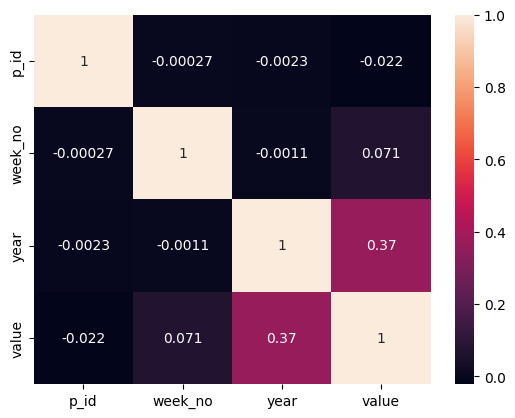

In [8]:
sb.heatmap(modfile.corr(), annot=True)

LINEPLOT BETWEEN "ID" AND "VALUE"

(array([ 975., 1000., 1025., 1050., 1075., 1100., 1125., 1150., 1175.,
        1200., 1225.]),
 [Text(975.0, 0, '975'),
  Text(1000.0, 0, '1000'),
  Text(1025.0, 0, '1025'),
  Text(1050.0, 0, '1050'),
  Text(1075.0, 0, '1075'),
  Text(1100.0, 0, '1100'),
  Text(1125.0, 0, '1125'),
  Text(1150.0, 0, '1150'),
  Text(1175.0, 0, '1175'),
  Text(1200.0, 0, '1200'),
  Text(1225.0, 0, '1225')])

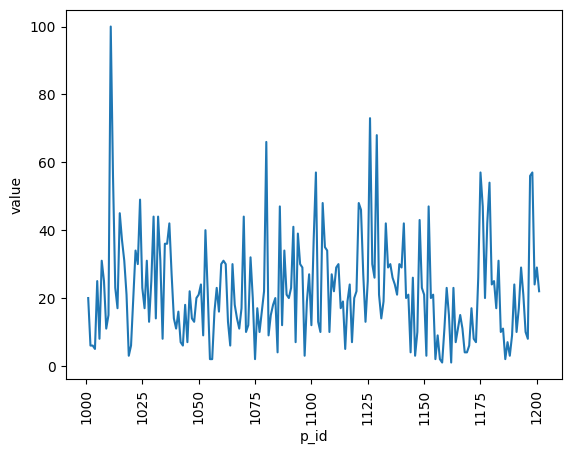

In [9]:
sb.lineplot(x="p_id", y="value", data=category)
mpl.xticks(rotation = 90)

PAIRPLOT FOR "ID"

In [10]:
#sb.pairplot(file, hue="p_id")

SPLIT DATASET INTO TRAINING AND TESTING DATASETS

In [11]:
x = file[["year", "week_no", "value"]]
y = file["id"]
train_x,test_x,train_y,test_y = train_test_split(x,y, test_size = 0.2)

IMPLEMENTING DIFFERENT MODELS

GAUSSIAN NAVE BAYES

In [12]:
GNB = GaussianNB()
GNB.fit(train_x,train_y)
print("Gaussian Naive Bayes score: ",GNB.score(test_x, test_y)*1000)

Gaussian Naive Bayes score:  18.626180336974635


DECISION TREE

In [13]:
DTC = tree.DecisionTreeClassifier(criterion='gini')
DTC.fit(train_x, train_y)
y_predict = DTC.predict(test_x)

print("Decission Tree Classifier score: ",accuracy_score(test_y, y_predict)*1000)

Decission Tree Classifier score:  9.294575078689132


KNN CLASSIFIER

In [14]:
KNC = KNeighborsClassifier()
KNC.fit(train_x, train_y)
y_pred_KNC = KNC.predict(test_x)
print("KNN Classifier score: ", accuracy_score(test_y, y_pred_KNC)*1000)

KNN Classifier score:  20.440659137196818


RANDOM FOREST CLASSIFIER

In [15]:
RFC= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
RFC.fit(train_x, train_y)
y_pred= RFC.predict(test_x)
print("Random Forest Classfier score: ", accuracy_score(test_y, y_pred)*1000)

Random Forest Classfier score:  5.887798555822996


ALL MODELS SCORE

In [16]:
print("Decission Tree Classifier score: ",accuracy_score(test_y, y_predict)*1000)
print("Random Forest Classfier score: ", accuracy_score(test_y, y_pred)*1000)
print("KNN Classifier score: ", accuracy_score(test_y, y_pred_KNC)*1000)
print("Gaussian Naive Bayes score: ",GNB.score(test_x, test_y)*1000)

Decission Tree Classifier score:  9.294575078689132
Random Forest Classfier score:  5.887798555822996
KNN Classifier score:  20.440659137196818
Gaussian Naive Bayes score:  18.626180336974635


In [17]:
joblib.dump(KNC, "Model.pkl")

['Model.pkl']

In [18]:
loaded_model = joblib.load("Model.pkl")
print("Score = ",round((loaded_model.score(test_x, test_y)*1000), 2), "%")

Score =  20.44 %


In [19]:
loaded_model.predict([[2002, 24, 22]])

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['fennel'], dtype=object)